# Machine Learning Course 1 Final Project
## Predict Students' Dropout and Academic Success
### Description of the Data
The dataset was compiled from multiple separate databases at a higher education institution. This dataset includes information available at the time of student enrollment, such as academic background, demographic details, and socio-economic factors, along with their academic performance at the end of the first and second semesters. Three target categories are included 'Enrolled', 'Graduate', 'Dropout'.

The goal of the dataset is to predict academic success using classification models. I will explore logistic regression, random forest, gradient boosting, and support vector machine models.

There are 36 features and 4424 instances in the dataset.

### Features

#### Numeric
1. 'Previous qualification (grade)'
1. 'Admission grade'
1. 'Age at enrollment
1. 'Unemployment rate'
1. 'Inflation rate'
1. 'GDP'
1. 'Curricular units 1st sem (credited)'
1. 'Curricular units 1st sem (enrolled)'
1. 'Curricular units 1st sem (evaluations)'
1. 'Curricular units 1st sem (approved)'
1. 'Curricular units 1st sem (grade)'
1. 'Curricular units 1st sem (without evaluations)'
1. 'Curricular units 2nd sem (credited)'
1. 'Curricular units 2nd sem (enrolled)'
1. 'Curricular units 2nd sem (evaluations)'
1. 'Curricular units 2nd sem (approved)'
1. 'Curricular units 2nd sem (grade)'
1. 'Curricular units 2nd sem (without evaluations)'
#### Multi class
1. 'Marital status'
1. 'Application mode'
1. 'Application order'
1. 'Course'
1. 'Previous qualification'
1. 'Nacionality'
1. 'Mother's qualification'
1. 'Father's qualification'
1. 'Mother's occupation'
1. 'Father's occupation'
#### Binary class
1. 'Daytime/evening attendance'
1. 'Displaced'
1. 'Educational special needs'
1. 'Debtor',
1. 'Tuition fees up to date'
1. 'Gender'
1. 'Scholarship holder'
1. 'International'
#### Target
1. 'Target - three classes: 'Enrolled', 'Graduate', 'Dropout'

### Citation
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

[Data Set Link](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

# Part 1 EDA

### Data Cleaning
The data source is high quality. There are no missing values in the dataset. Later, I will encode the multi-class features and scale the numeric features.

### Coorelation Analysis
See the matrix below.

In the coorelation matrix some intuitive observations can be observed. For example, mother's and father's occupations/qualifications and coorelations are strongly coorelated with each other. This suggests that people with similar backgrounds tend to marry each other. Also, curricular units enrolled and credited are strongly coorelated.

Only curricular units approved and grades are somewhat coorelated with the target variable. This suggests that academic performance is a good indicator of whether a student will drop out, continue, or graduate. 

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
    data = pd.read_csv("data.csv", delimiter=";")
    # convert 'Target' from 'Dropout', 'Enrolled', 'Graduated' to 0, 1, 2
    data["Target"] = data["Target"].map({"Dropout": 0, "Enrolled": 1, "Graduate": 2})

    return data

data = get_data()

In [159]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [160]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [161]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [188]:
# Count missing values
missing = data.isnull().sum()

# are there any missing values?
print(missing[missing > 0])

Series([], dtype: int64)


c:\Users\lwill\Documents\CU-Boulder-Python\.conda\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\lwill\AppData\Local\Temp\ipykernel_5480\2728823384.py:5: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig("full_correlation_matrix.png")
c:\Users\lwill\Documents\CU-Boulder-Python\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


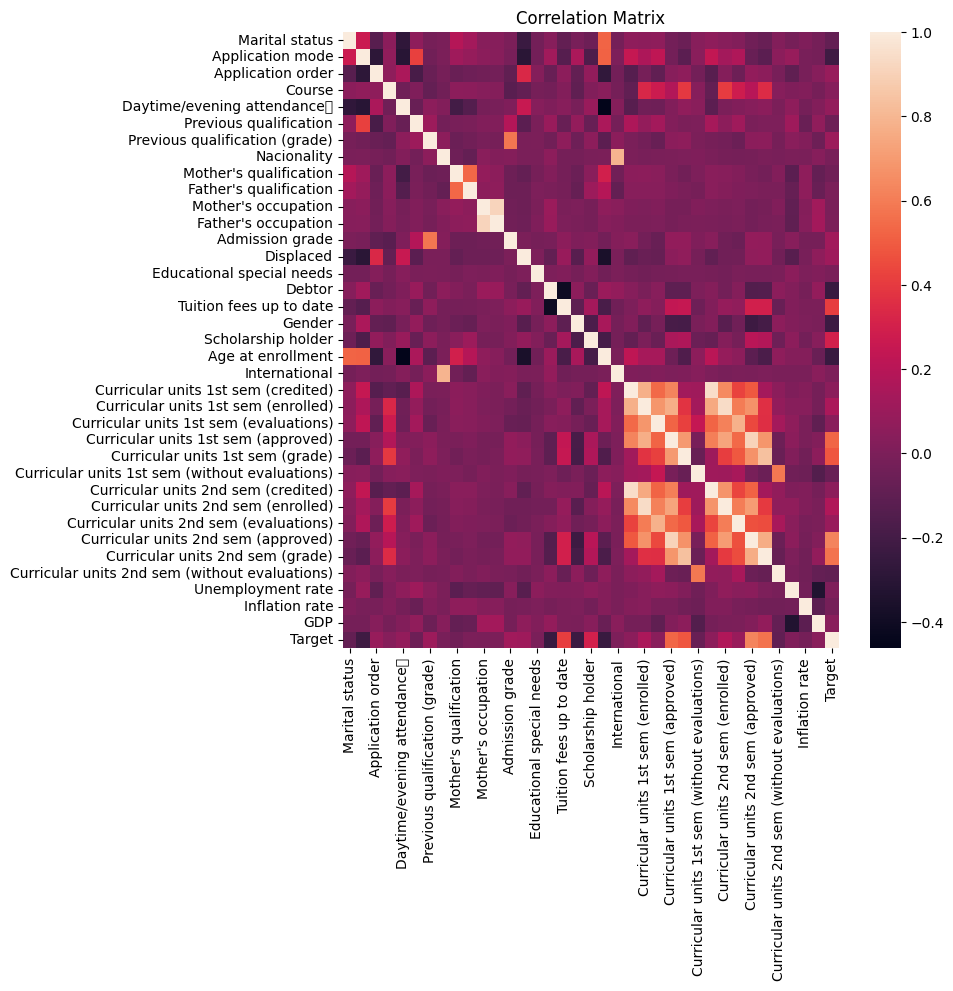

In [162]:
corr = data.corr()
plt.figure(figsize=(8, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr)
plt.savefig("full_correlation_matrix.png")

# Part 2 Model Selection

In [163]:


def get_scaled_data(data_df):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    X = data_df.drop(columns=["Target"])
    y = data_df["Target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

### Hyperparameter Tuning
The following will be used for tuning hyperparameters using grid search.

In [182]:
param_grid_logistic = {
    "C": np.logspace(-3, 3, 20),
    "penalty": ["l2"],
    "solver": ["lbfgs", "sag"],  # ["liblinear","newton-cg","lbfgs","sag","saga"],
    "n_jobs": [-1],
}

param_grid_GradientBoostingClassifier = {
    "n_estimators": np.linspace(50, 1000, 5, dtype=int),
    "learning_rate": [0.01, 0.1],
    "max_depth": [2, 3, 4],
    "random_state": [1],
}

param_grid_RandomForestClassifier = {
    "n_estimators": np.linspace(300, 1300, 5, dtype=int),
    "max_depth": np.linspace(20, 60, 5, dtype=int),
    "min_samples_split": [2, 3, 5],
    "n_jobs": [-1],
    "random_state": [1],
}
 
param_grid_SVC = { # {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 1}
    "C": np.logspace(-5, 5, 10),
    "gamma": np.logspace(-5, 5, 10),
    "kernel": ["poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "random_state": [1],
}

# Baseline logistic regression model
A logistic regression model for classification has an accuracy score of **0.7773**.

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = get_scaled_data(get_data())

grid_search_logistic = GridSearchCV(LogisticRegression(random_state=1), param_grid_logistic, cv=5, n_jobs=-1)

grid_search_logistic.fit(X_train, y_train)

best_params = grid_search_logistic.best_params_
best_score = grid_search_logistic.best_score_
best_estimator = grid_search_logistic.best_estimator_

print(f'Logistic Regression best parameters: {best_params}')
print(f'Logistic Regression best score: {best_score}')

scores = {}
scores['baseline_LogisticRegression'] = (best_score, best_estimator.score(X_test, y_test))

Logistic Regression best parameters: {'C': 0.07847599703514611, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'sag'}
Logistic Regression best score: 0.7660393642269796


# Baseline Gradient Boosting
A gradient boosting model for classification has an accuracy score of **0.7844**.

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = get_scaled_data(get_data())

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['baseline_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))

GradientBoostingClassifier best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'random_state': 1}
GradientBoostingClassifier best score: 0.7733835974396471


# Baseline Random Forest
A random forest model for classification has an accuracy score of **0.7616**.

In [167]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_scaled_data(get_data())

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['baseline_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))

RandomForestClassifier best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 800, 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7733863943295056


# Data Preprocessing
Multi-class columns are converted to binary columns using one-hot encoding. Float and integer columns are standardized. The data is then split into training and testing sets.

In [168]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def get_preprocessed_data(data):
    cat_features = [
        "Marital status",
        "Application mode",
        "Application order",
        "Course",
        "Previous qualification",
        "Nacionality",
        "Mother's qualification",
        "Father's qualification",
        "Mother's occupation",
        "Father's occupation",
        "Gender",
        "Tuition fees up to date",
        "Scholarship holder",
        "International",
        "Debtor",
        "Displaced",
        "Educational special needs",
        'Daytime/evening attendance\t',
    ]

    numeric_features = data.drop("Target", axis=1).columns.difference(cat_features)
    # print(f"Numeric features: {numeric_features}")

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(), cat_features),  # One-hot encode the categorical columns
            (
                "num",
                StandardScaler(),
                numeric_features,
            ),  # Standardize the remaining columns
        ]
    )

    data = get_data()

    X = data.drop(columns=["Target"])
    print(f"Shape of X before OneHot Encoding and Standardizing: {X.shape}")
    X = preprocessor.fit_transform(X)
    print(f"Shape of X after OneHot Encoding and Standardizing: {X.shape}")
    y = data["Target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1
    )

    return X_train, X_test, y_train, y_test

# After Preprocessing, Check all models again!

# Logistic Regression post-preprocessing

In [169]:
X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, n_jobs=-1)

grid_search_logistic.fit(X_train, y_train)

best_params = grid_search_logistic.best_params_
best_score = grid_search_logistic.best_score_
best_estimator = grid_search_logistic.best_estimator_

print(f'Logistic Regression best parameters: {best_params}')
print(f'Logistic Regression best score: {best_score}')

scores['post_preprocessing_LogisticRegression'] = (best_score, best_estimator.score(X_test, y_test))

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Logistic Regression best parameters: {'C': 0.1623776739188721, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression best score: 0.7767746266152038


# Gradient Boosting post-preprocessing

In [170]:
X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['post_preprocessing_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))


Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
GradientBoostingClassifier best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 762, 'random_state': 1}
GradientBoostingClassifier best score: 0.7753617976809787


# Random Forest post-preprocessing

In [171]:
X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['post_preprocessing_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
RandomForestClassifier best parameters: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 1300, 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7733899903307522


# PCA for Dimensionality Reduction

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)


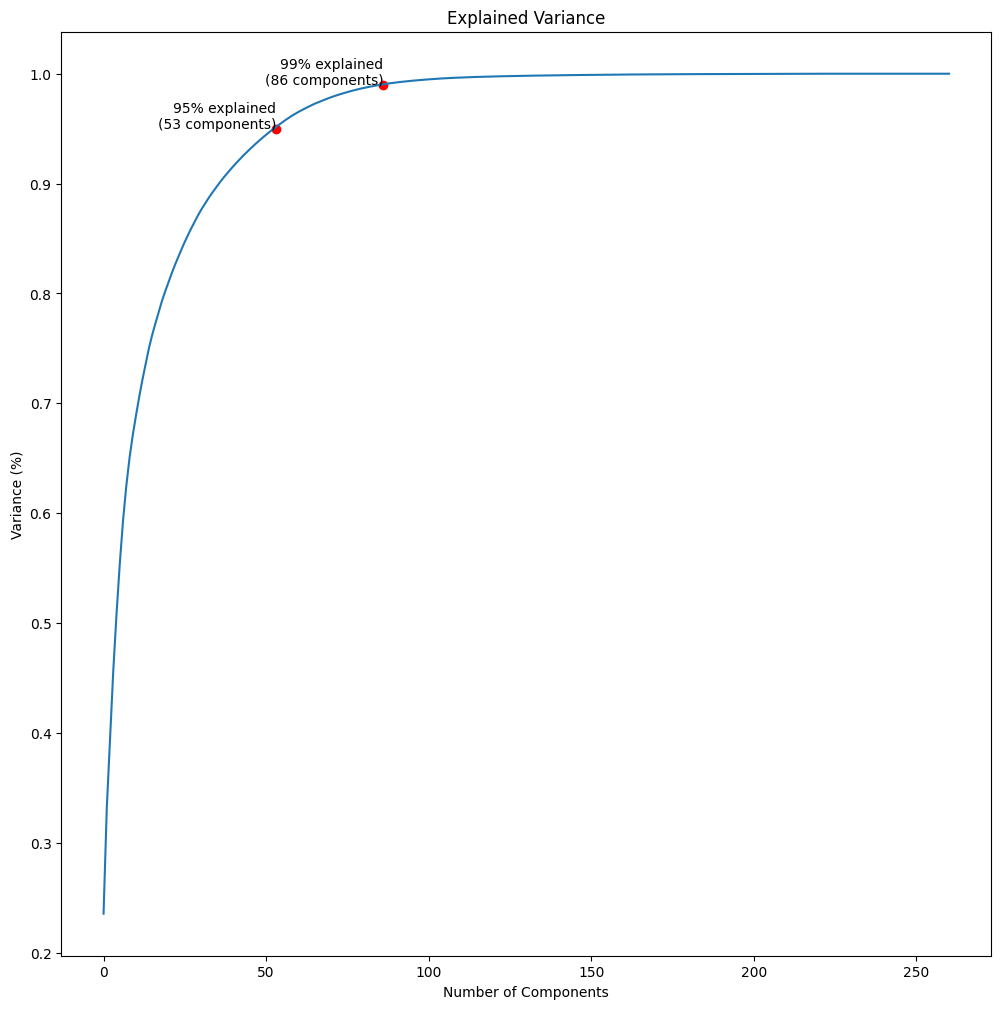

In [172]:
# PCA

from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA()
X_pca = pca.fit_transform(X_train)

explained_variance_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
explained_variance_99 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

plt.figure(figsize=(12, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(explained_variance_95, 0.95, color="red")
plt.text(explained_variance_95, 0.95, f"95% explained\n({explained_variance_95} components)", ha="right")
plt.scatter(explained_variance_99, 0.99, color="red")
plt.text(explained_variance_99, 0.99, f"99% explained\n({explained_variance_99} components)", ha="right")
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.savefig("explained_variance.png")


In [173]:

X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, n_jobs=-1)

grid_search_logistic.fit(X_train, y_train)

best_params = grid_search_logistic.best_params_
best_score = grid_search_logistic.best_score_
best_estimator = grid_search_logistic.best_estimator_

print(f'Logistic Regression best parameters: {best_params}')
print(f'Logistic Regression best score: {best_score}')

scores['post_pca_LogisticRegression'] = (best_score, best_estimator.score(X_test, y_test))

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Logistic Regression best parameters: {'C': 0.07847599703514611, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression best score: 0.7728178265768465


In [174]:
X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=5, n_jobs=-1)

grid_search_GradientBoostingClassifier.fit(X_train, y_train)

best_params = grid_search_GradientBoostingClassifier.best_params_
best_score = grid_search_GradientBoostingClassifier.best_score_
best_estimator = grid_search_GradientBoostingClassifier.best_estimator_

print(f'GradientBoostingClassifier best parameters: {best_params}')
print(f'GradientBoostingClassifier best score: {best_score}')

scores['post_pca_GradientBoostingClassifier'] = (best_score, best_estimator.score(X_test, y_test))



Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
GradientBoostingClassifier best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 287, 'random_state': 1}
GradientBoostingClassifier best score: 0.7615163937701277


In [175]:
X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

grid_search_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), param_grid_RandomForestClassifier, cv=5, n_jobs=-1)

grid_search_RandomForestClassifier.fit(X_train, y_train)

best_params = grid_search_RandomForestClassifier.best_params_
best_score = grid_search_RandomForestClassifier.best_score_
best_estimator = grid_search_RandomForestClassifier.best_estimator_

print(f'RandomForestClassifier best parameters: {best_params}')
print(f'RandomForestClassifier best score: {best_score}')

scores['post_pca_RandomForestClassifier'] = (best_score, best_estimator.score(X_test, y_test))


Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
RandomForestClassifier best parameters: {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 800, 'n_jobs': -1, 'random_state': 1}
RandomForestClassifier best score: 0.7592541094303134


In [183]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

grid_search_SVC = GridSearchCV(SVC(), param_grid_SVC, cv=5, n_jobs=-1, verbose=3)

grid_search_SVC.fit(X_train, y_train)

best_params = grid_search_SVC.best_params_
best_score = grid_search_SVC.best_score_
best_estimator = grid_search_SVC.best_estimator_
print(f'SVC best parameters: {best_params}')
print(f'SVC best score: {best_score}')

scores['post_pca_SVC'] = (best_score, best_estimator.score(X_test, y_test))



Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
SVC best parameters: {'C': 46.41588833612782, 'degree': 2, 'gamma': 0.0016681005372000592, 'kernel': 'rbf', 'random_state': 1}
SVC best score: 0.7818617697120802


# Part 3 Results

In [184]:
# Breakdown all scores
print('For each, a breakdown of the scores from GridSearchCV and the score from the test set')
for key, value in scores.items():
    print(f"{key}: {value}")

For each, a breakdown of the scores from GridSearchCV and the score from the test set
baseline_LogisticRegression: (0.7660393642269796, 0.7570621468926554)
baseline_GradientBoostingClassifier: (0.7733835974396471, 0.7785310734463277)
baseline_RandomForestClassifier: (0.7733863943295056, 0.7819209039548023)
post_preprocessing_LogisticRegression: (0.7767746266152038, 0.7819209039548023)
post_preprocessing_GradientBoostingClassifier: (0.7753617976809787, 0.7785310734463277)
post_preprocessing_RandomForestClassifier: (0.7733899903307522, 0.7706214689265537)
post_pca_LogisticRegression: (0.7728178265768465, 0.768361581920904)
post_pca_GradientBoostingClassifier: (0.7615163937701277, 0.7604519774011299)
post_pca_RandomForestClassifier: (0.7592541094303134, 0.7593220338983051)
post_pca_SVC: (0.7818617697120802, 0.7830508474576271)


# Model Choice
On the test data, the baseline random forest classifier score 0.7819 and ran (including the grid search) for under 1 minute.

After preprocessing, where multi-class columns are converted to binary columns using one-hot encoding and float and integer columns are standardized, the logistic regression classifier matches the baseline random forest classifier with a score of 0.7819. The logistic regression classifier ran in about 1 second.

Finally, SVC scored 0.7831 on the test data and ran a grid search in 2 minutes. As seen below, a single run of SVC with the selected parameters runs in under 1 second and scores 0.7831 on the test data.


In [186]:
# Final Model
# SVC parameters were selected above with GridSearchCV
params = {'C': 46.41588833612782, 'degree': 2, 'gamma': 0.0016681005372000592, 'kernel': 'rbf', 'random_state': 1}

X_train, X_test, y_train, y_test = get_preprocessed_data(get_data())

pca = PCA(n_components=explained_variance_99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

final_model = SVC(**params)

final_model.fit(X_train, y_train)

final_score = final_model.score(X_test, y_test)

print(f'Final Model score: {final_score}')

Shape of X before OneHot Encoding and Standardizing: (4424, 36)
Shape of X after OneHot Encoding and Standardizing: (4424, 262)
Final Model score: 0.7830508474576271


# Conclusion
Even the best model predicted under 0.8 accuracy. This suggests that the data does not include all of the relevant features for academic success. In particular, the data does not include any behavioral information. I suspect that data around study habits, motivation, clubs, and extracurricular activities would be useful in predicting academic success. The data also lacks information about students who have children or are employed and the nature of their employment. A more comprehensive dataset would likely improve the accuracy of the models.

That said, roughly 80% accuracy is useful for identifying students that would benefit from supports like early intervention and second chance programs.